<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sakti Kusuma Aji | 22.11.4677 | IF 03

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-ai',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-ai',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 168 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),

    Flatten(),

    Dense(3, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
NIM = "4677"
epochs = 3 * int(NIM[-1])
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/21
6/6 [==============================] - 5s 804ms/step - loss: 0.8037 - accuracy: 0.6548 - val_loss: 0.5692 - val_accuracy: 0.8250
Epoch 2/21
6/6 [==============================] - 3s 633ms/step - loss: 0.7460 - accuracy: 0.7917 - val_loss: 0.5679 - val_accuracy: 0.8250
Epoch 3/21
6/6 [==============================] - 3s 570ms/step - loss: 0.6694 - accuracy: 0.7917 - val_loss: 0.6257 - val_accuracy: 0.8250
Epoch 4/21
6/6 [==============================] - 3s 573ms/step - loss: 0.6801 - accuracy: 0.7917 - val_loss: 0.6013 - val_accuracy: 0.8250
Epoch 5/21
6/6 [==============================] - 4s 671ms/step - loss: 0.6560 - accuracy: 0.7917 - val_loss: 0.5637 - val_accuracy: 0.8250
Epoch 6/21
6/6 [==============================] - 3s 496ms/step - loss: 0.6554 - accuracy: 0.7917 - val_loss: 0.5612 - val_accuracy: 0.8250
Epoch 7/21
6/6 [==============================] - 3s 508ms/step - loss: 0.6550 - accuracy: 0.7917 - val_loss: 0.5857 - val_accuracy: 0.8250
Epoch 8/21
6/6 [====

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-ai',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

Found 208 images belonging to 3 classes.
7/7 [==============================] - 3s 389ms/step - loss: 0.6136 - accuracy: 0.7981
Test Accuracy: 0.7980769276618958


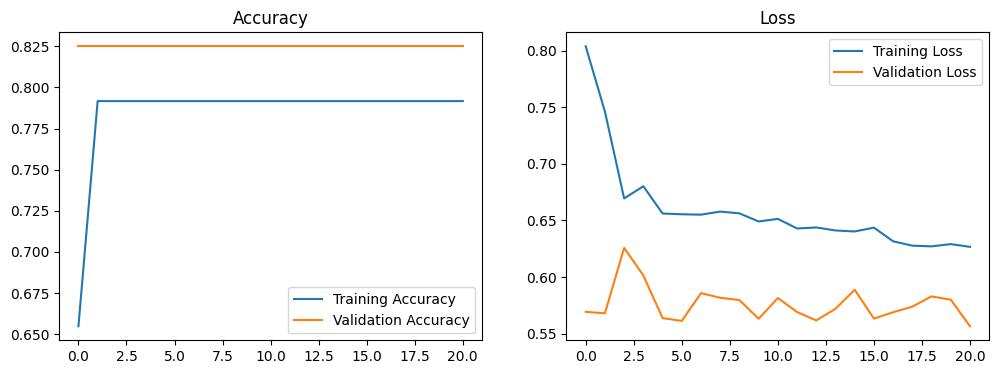

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [22]:
model.save('model_rempah_instants.h5')